In [12]:
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%pylab inline
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = list()
with open("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q1/data/faces.csv") as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for row in reader:
        data.append(row)
        
# the items in data was string, convert to float
data = np.mat(data).astype(np.float)

In [3]:
# calculate the summationMatrix
summationMatrix = data.T.dot(data) / len(data)

# for i in range(data.shape[1]):
#     line = data[:,i].reshape(data.shape[0], 1) #I'm not sure about the def of column vector here
#     summationMatrix[i,i] = line.T.dot(line)

In [4]:
# create eigenvalues and eigenvectors
start = time.time()
w, v = np.linalg.eig(summationMatrix)
end = time.time()
print(end - start)

242.1145429611206


In [5]:
target = list([1,2,10,30,50])

for i in target:
    print(i, w[i-1])

print(sum(w))

# P1b-1
# sum of eigenvalues is 1084.2074349947675
# lambda 1,2,10,30,50 as follows:
# 1 (781.8126992600016+0j)
# 2 (161.15157496732692+0j)
# 10 (3.339586754887817+0j)
# 30 (0.8090877903777284+0j)
# 50 (0.38957773951814617+0j)

1 (781.8126992600016+0j)
2 (161.15157496732692+0j)
10 (3.339586754887817+0j)
30 (0.8090877903777284+0j)
50 (0.38957773951814617+0j)
(1084.2074349947684+1.3361331582180887e-29j)


In [6]:
# P1b-2
def rec_error(k, eigenvalues):
    return((k, 1 - sum(eigenvalues[0:k])/sum(eigenvalues)))

In [7]:
error_list = list()
for i in range(1, 50+1):
    error_list.append(rec_error(i, w))

/Users/januaryshen/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


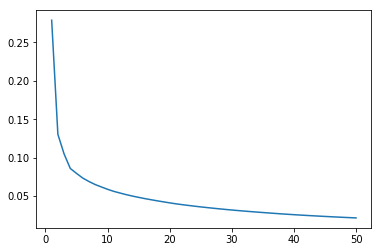

In [8]:
plt.plot(*zip(*error_list))
plt.show()

In [ ]:
# P1b-3 
# The principle eigenvalue captured a certain pattern of the graphs, and that feature is 
# so significant that lambda1 is much larger than other eigenvalues 

/Users/januaryshen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


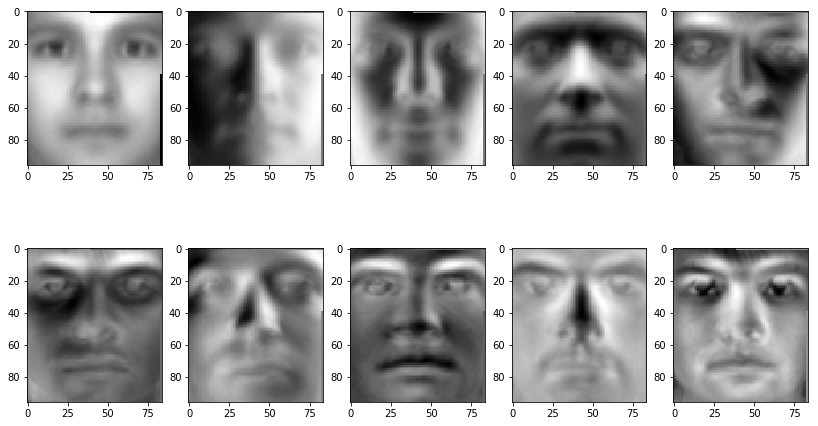

In [14]:
#P1c-1

columns = 5
rows = 2
fig=plt.figure(figsize=(14, 8))

for i in range(1,10 + 1):
    img = v[:,i-1].astype(np.float).reshape(84,96)
    img = ndimage.rotate(img, 270)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()


In [ ]:
# P1c-2
# 1: stripe pattern
# 2: color scale pattern
# 3: symmetrical color scale pattern
# 4: stripe pattern + lighter color scale in the middle
# 5: stripe pattern + blurred middle part + lighter buttom part
# 6: stripe pattern + blurred middle part + darker buttom part
# 7: stripe pattern + blurred middle and buttom part
# 8: array of something + dark color scale
# 9: array of something + lighter color scale + blurry everywhere
#10: array of something + dark color of item

/Users/januaryshen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


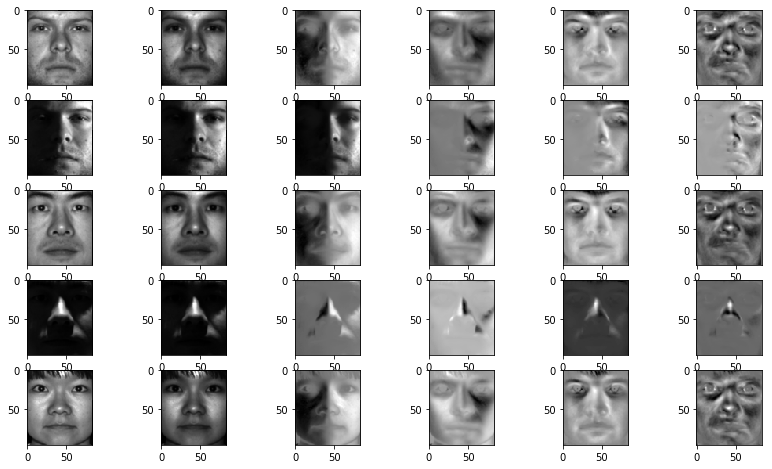

In [21]:
#P1d-1
target_image = [1,24,65,68,257] 
k_list = [1,2,5,10,50]

fig=plt.figure(figsize=(14, 8))
columns = 6
rows = 5
counter = 1
for i in target_image:
    # to arrange the original graph
    img = data[i-1].astype(np.float).reshape(84,96)
    img = ndimage.rotate(img, 270)
    fig.add_subplot(rows, columns, counter)
    counter += 1
    plt.imshow(img, cmap = 'gray')
    for j in k_list:
        img = np.multiply(data[i-1],(v[:,j-1].T)).astype(np.float).reshape(84,96)
        img = ndimage.rotate(img, 270)
        fig.add_subplot(rows, columns, counter)
        counter += 1
        plt.imshow(img, cmap = 'gray')
plt.show()

# image = np.multiply(data[0],(v[:,50].T))
# img = image.astype(np.float).reshape(96,84)
# plt.imshow(img, cmap = 'gray')
# plt.show()

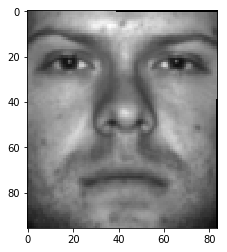

In [22]:
# check how data[0] looks like
img = data[0].astype(np.float).reshape(84,96)
img = ndimage.rotate(img, 270)
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
# P1d-2
# The resolution went down a bit for each image. Patterns were shown by eigenvector features.